# Import necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# LOADING DATASETS

In [2]:
df = pd.read_csv(r'E:\Datasets\abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [87]:
df.shape

(4177, 10)

Modifying the datasets

In [88]:
Age=1.5+df.Rings
df["Age"]=Age
data=df.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 326.5 KB


# 3.Perform various Visualizations

Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

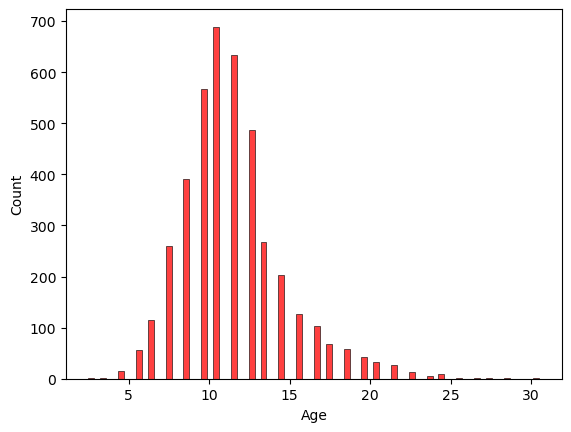

In [90]:
sns.histplot(data["Age"],color='red')

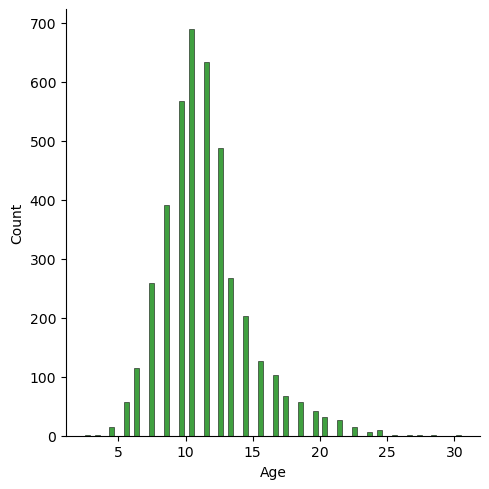

In [91]:
sns.displot(data["Age"],color='green') 

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

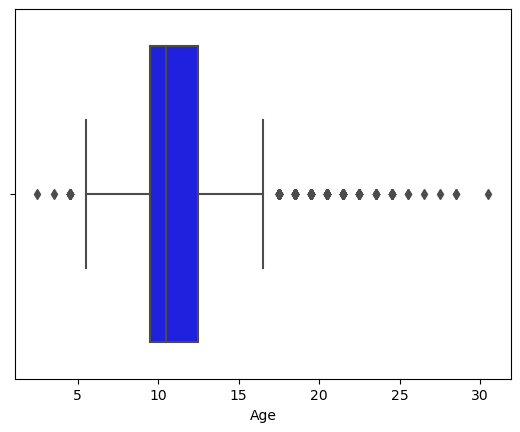

In [92]:
sns.boxplot(data["Age"],color='blue')

Bivariate Analysis

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Whole_weight'>

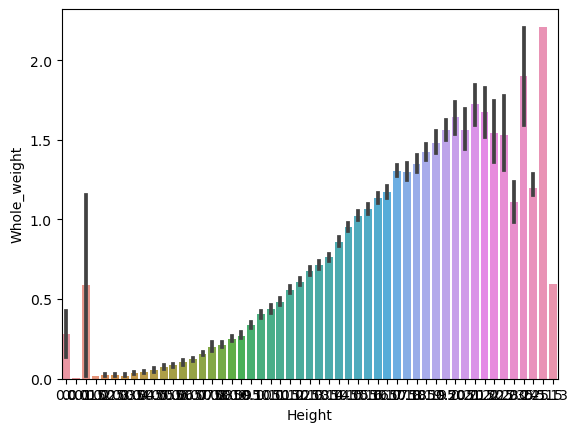

In [93]:
sns.barplot(data["Height"],data["Whole_weight"])

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Whole_weight'>

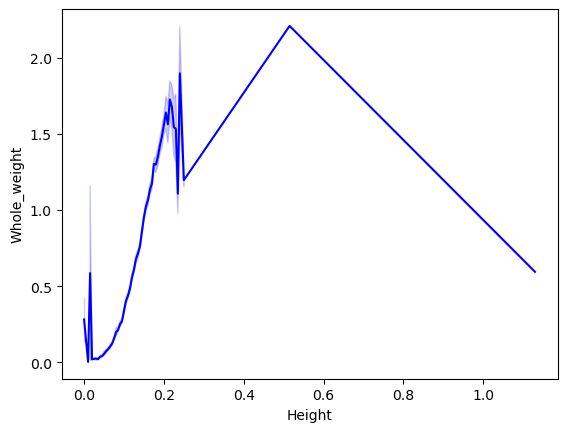

In [94]:
sns.lineplot(data["Height"],data["Whole_weight"], color='blue')

<AxesSubplot:xlabel='Height', ylabel='Whole_weight'>

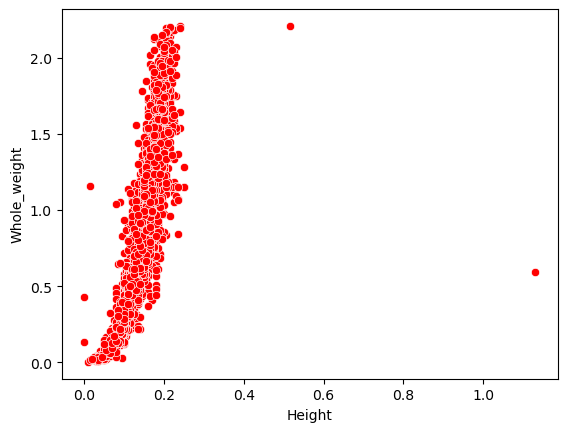

In [95]:
sns.scatterplot(x=data.Height,y=data.Whole_weight,color='red')

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Whole_weight'>

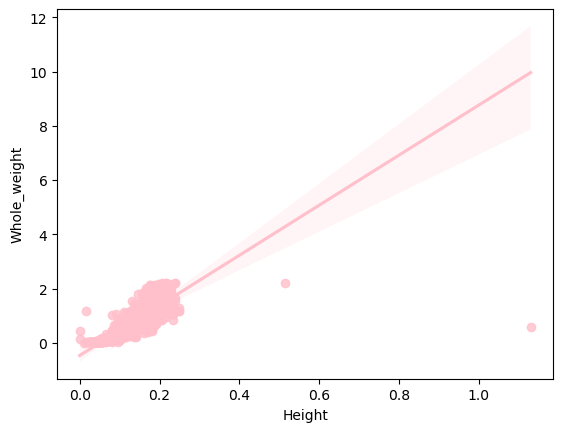

In [96]:
sns.regplot(data['Height'],data['Whole_weight'],color='pink') 

Multivariate Analysis

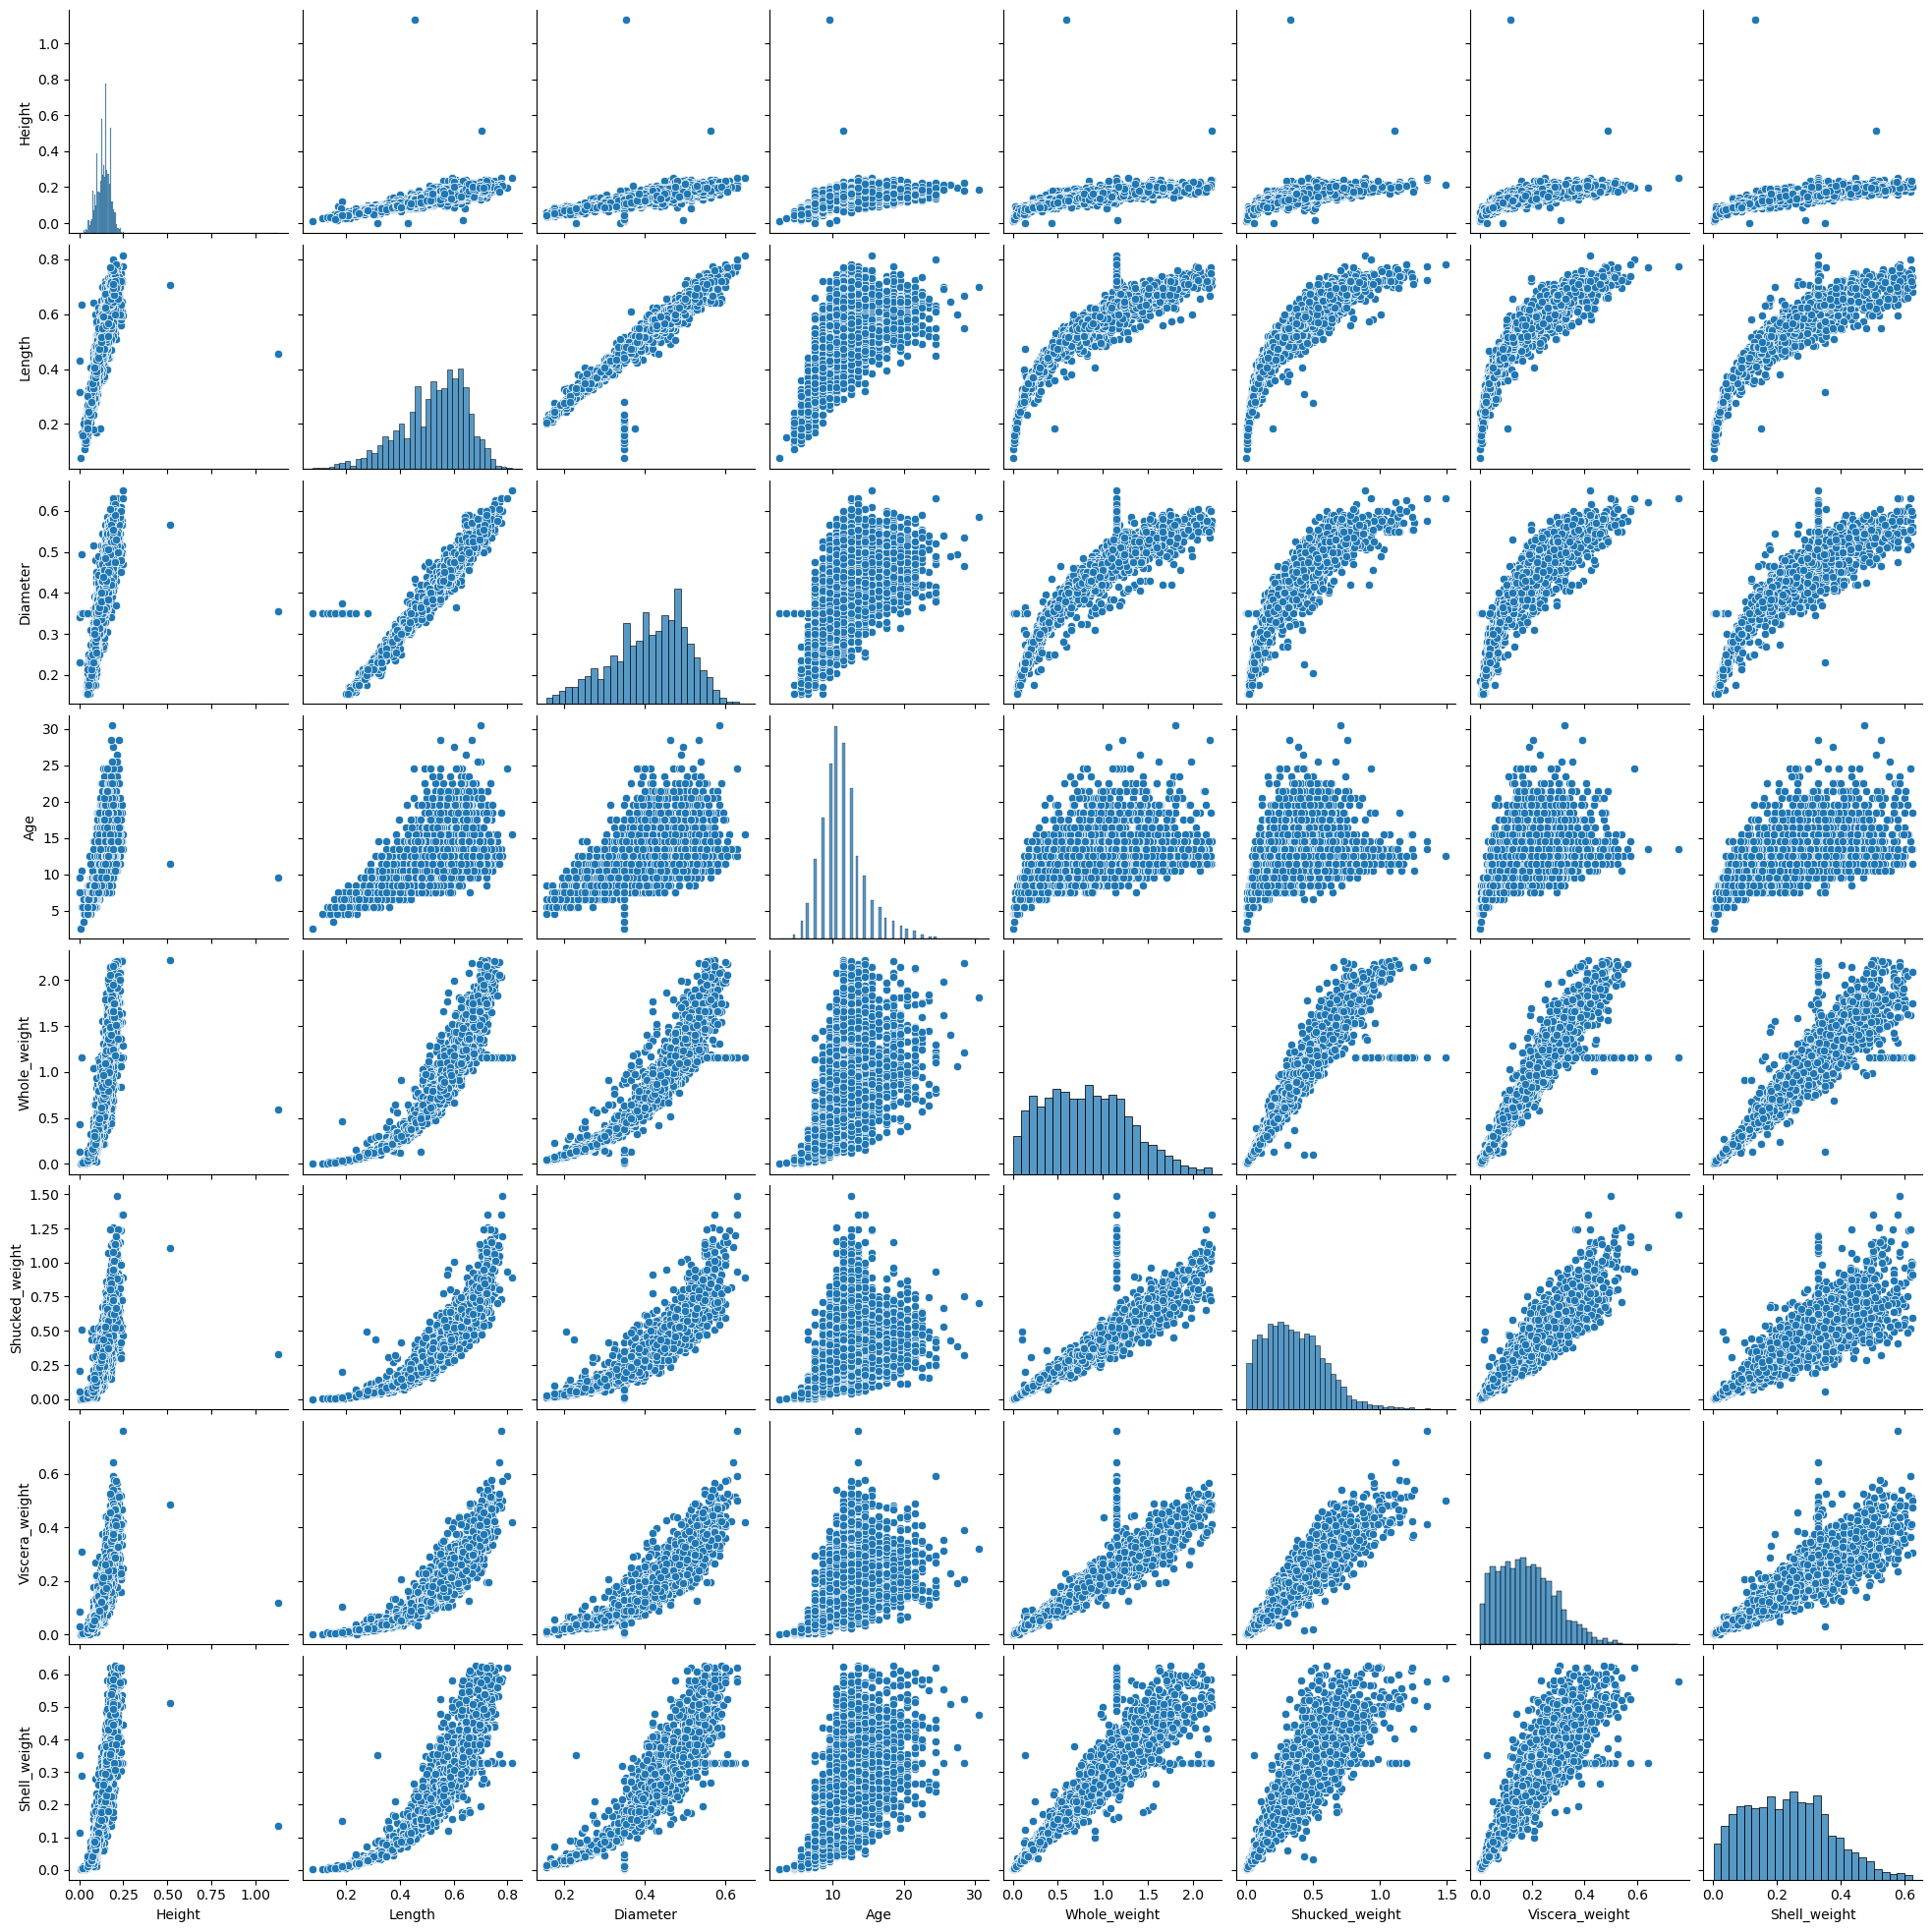

In [97]:
sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight"]])

# 4.Perform descriptive statistics on the dataset.

In [98]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.411026,0.139516,0.819760,0.359367,0.180594,0.235548,11.433684
std,0.827815,0.120093,0.093644,0.041827,0.472379,0.221963,0.109614,0.131987,3.224169
min,0.000000,0.075000,0.155000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.210000,1.488000,0.760000,0.625000,30.500000


# 5.Check for Missing values

In [99]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

# 6.Find the outliers and replacing them outliers

In [100]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0.25,0.0,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,2.0,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [101]:
q1 = data.Age.quantile(0.25)
q3 = data.Age.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
data.median(numeric_only=True)

Sex                1.0000
Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               10.5000
dtype: float64

<AxesSubplot:xlabel='Age'>

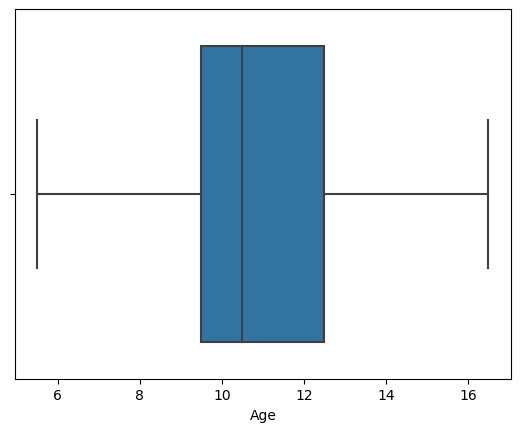

In [102]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

# 7.Check for Categorical columns and perform Encoding

In [103]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# 8.Split the data into dependent and independent variables

In [105]:
y = data["Sex"]
y.head()

0    0
1    0
2    1
3    0
4    2
Name: Sex, dtype: int64

In [106]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# 9.Scale the independent values

In [107]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,-0.574558,-0.491555,-1.064424,-0.647355,-0.607685,-0.726212,-0.648229,1.577830
1,-1.448986,-1.559552,-1.183978,-1.258167,-1.170910,-1.205221,-1.254420,-0.919022
2,0.050033,0.095844,-0.107991,-0.302251,-0.463500,-0.356690,-0.193585,-0.294809
3,-0.699476,-0.491555,-0.347099,-0.643121,-0.648238,-0.607600,-0.610342,0.017298
4,-1.615544,-1.666352,-1.423087,-1.301570,-1.215968,-1.287337,-1.368081,-0.919022


# 10. Split the data into training and testing

In [108]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [109]:
X_Train.shape,X_Test.shape

((3341, 8), (836, 8))

In [110]:
Y_Train.shape,Y_Test.shape

((3341,), (836,))

In [111]:
X_Train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
3141,-2.864726,-0.651755,-1.423087,-1.665728,-1.553902,-1.583867,-1.709063,-1.543234
3521,-2.573250,-0.651755,-2.020857,-1.648790,-1.551650,-1.565619,-1.690120,-1.387181
883,1.132658,1.270641,0.728888,1.208370,1.041436,0.286552,1.647720,1.577830
3627,1.590691,1.217241,1.446213,2.265912,2.661269,2.330326,1.477229,0.017298
2106,0.591345,0.469643,0.370226,0.468409,0.255175,0.272866,0.980910,1.265723


In [112]:
X_Test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
668,0.216591,0.149244,0.370226,0.206935,-0.368878,0.569396,0.753588,0.953617
1580,-0.199803,-0.117756,-0.466653,-0.431401,-0.443224,-0.343004,-0.318612,-0.606915
3784,0.799543,0.736642,0.370226,0.922549,0.755318,1.764639,0.620984,0.329404
463,-2.531611,-2.627550,-2.020857,-1.620208,-1.522362,-1.538247,-1.633289,-1.543234
2615,1.007740,0.950242,0.848442,1.462434,1.415417,1.778325,1.075627,0.641511


In [113]:
Y_Train.head()

3141    2
3521    2
883     0
3627    0
2106    0
Name: Sex, dtype: int64

In [114]:
Y_Test.head()

668     0
1580    2
3784    0
463     2
2615    0
Name: Sex, dtype: int64

# 11.Build the Model

In [115]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [116]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [117]:
y_predict = model.predict(X_Test)

In [118]:
y_predict_train = model.predict(X_Train)

# 12.Train the Model

In [119]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.98263992816522


# 13.Test the Model

In [120]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.5586124401913876


# 14.Measure the performance using Metrics

In [121]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,154,97,45
1,127,98,24
2,45,31,215


In [122]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.47      0.52      0.50       296
           1       0.43      0.39      0.41       249
           2       0.76      0.74      0.75       291

    accuracy                           0.56       836
   macro avg       0.55      0.55      0.55       836
weighted avg       0.56      0.56      0.56       836

